In [1]:
%load_ext autoreload
%autoreload 2

import os
from os.path import join
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import MAS_library as MASL
import Pk_library as PKL

os.chdir('/home/mattho/git/ltu-cmass/matts_tests')
mpl.style.use('./style.mcstyle')

In [2]:
wdir = '/home/mattho/data/abacus/abacus_nicolas'
lhids = np.arange(130, 159, dtype=int)

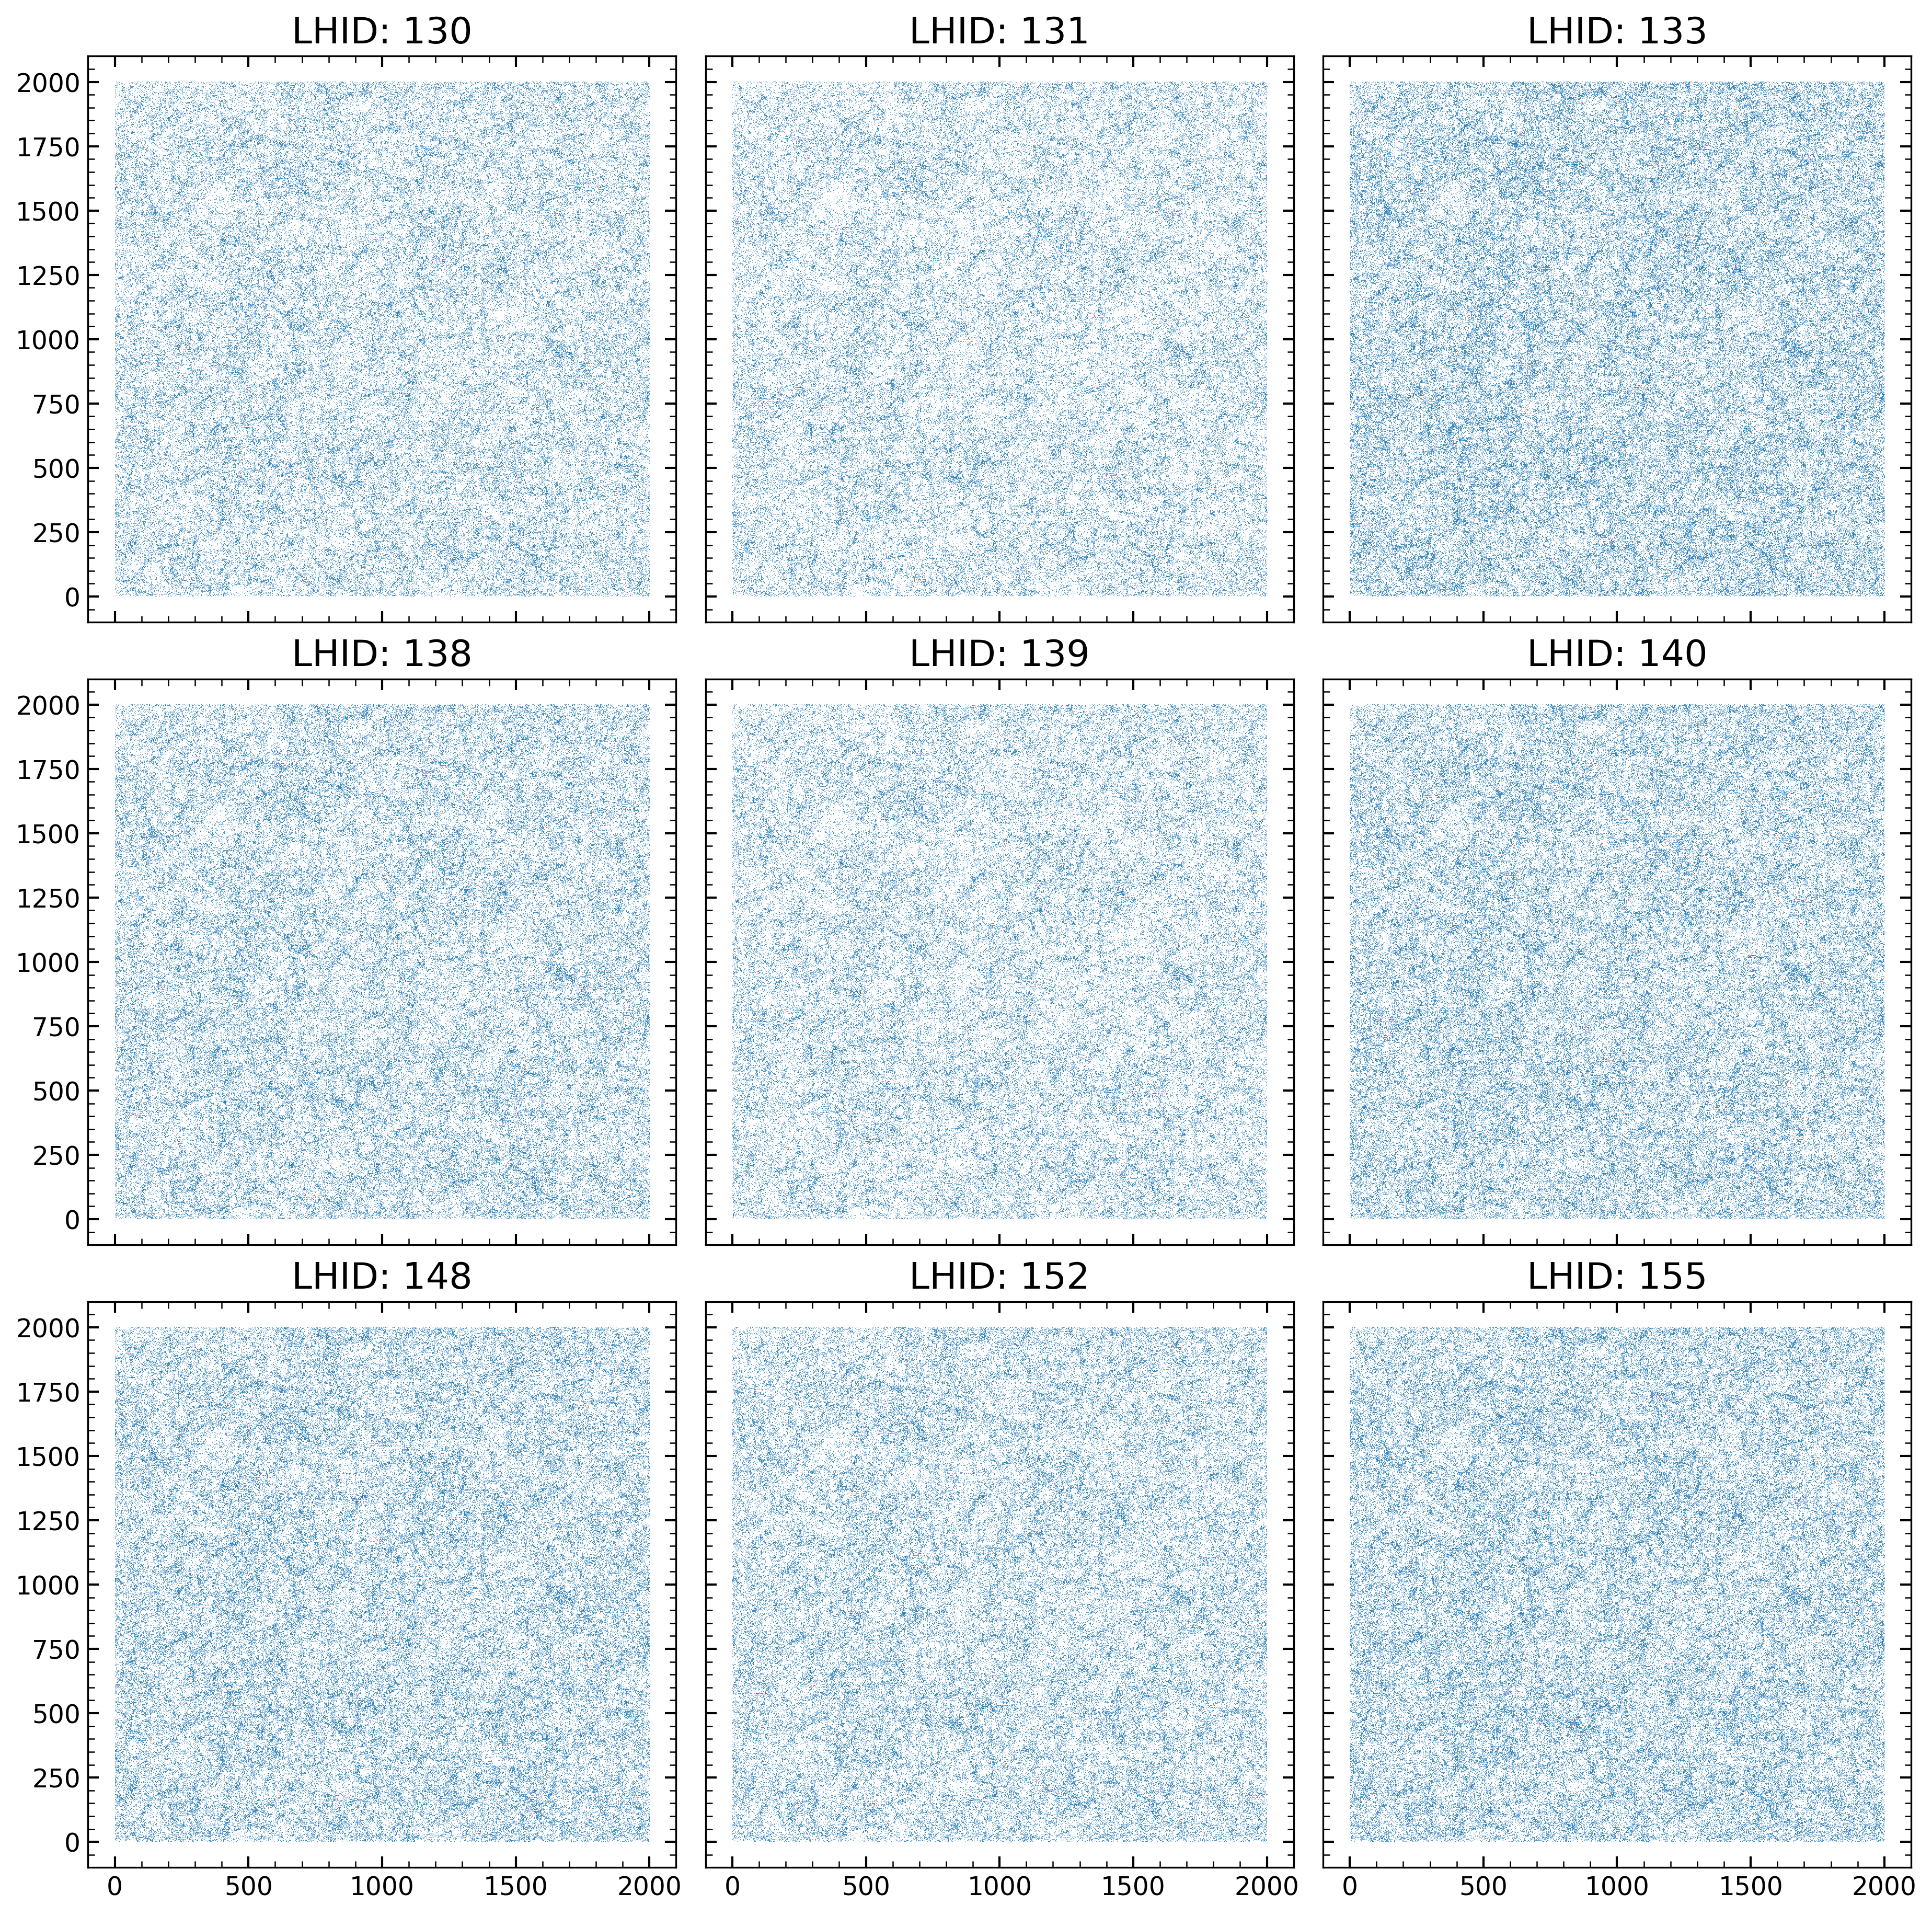

In [5]:
# Plot position distribution
N = 9
inds = np.random.choice(lhids, N, replace=False)
inds.sort()

def slice_mask(x, i, di, N=256, L=2000, axis=0):
    x_min, x_max = i*L/N, (i+di)*L/N
    return (x[:, axis] >= x_min) & (x[:, axis] < x_max)

M=3
f, axs = plt.subplots(N//M, M, figsize=(5*M, 5*(N//M)),
                      sharex=True, sharey=True,
                      gridspec_kw={'hspace': 0.1, 'wspace': 0.05},
                      dpi=300)
axs = axs.flatten()
for i, ax in enumerate(axs):
    ind = inds[i]
    hpos = np.load(join(wdir, str(ind), 'halo_pos.npy')) + 1000
    mask = slice_mask(hpos, 100, 20)
    _p = hpos[mask]
    ax.plot(_p[:, 1], _p[:, 2], ',', alpha=0.8)
    ax.set_title(f'LHID: {ind}')

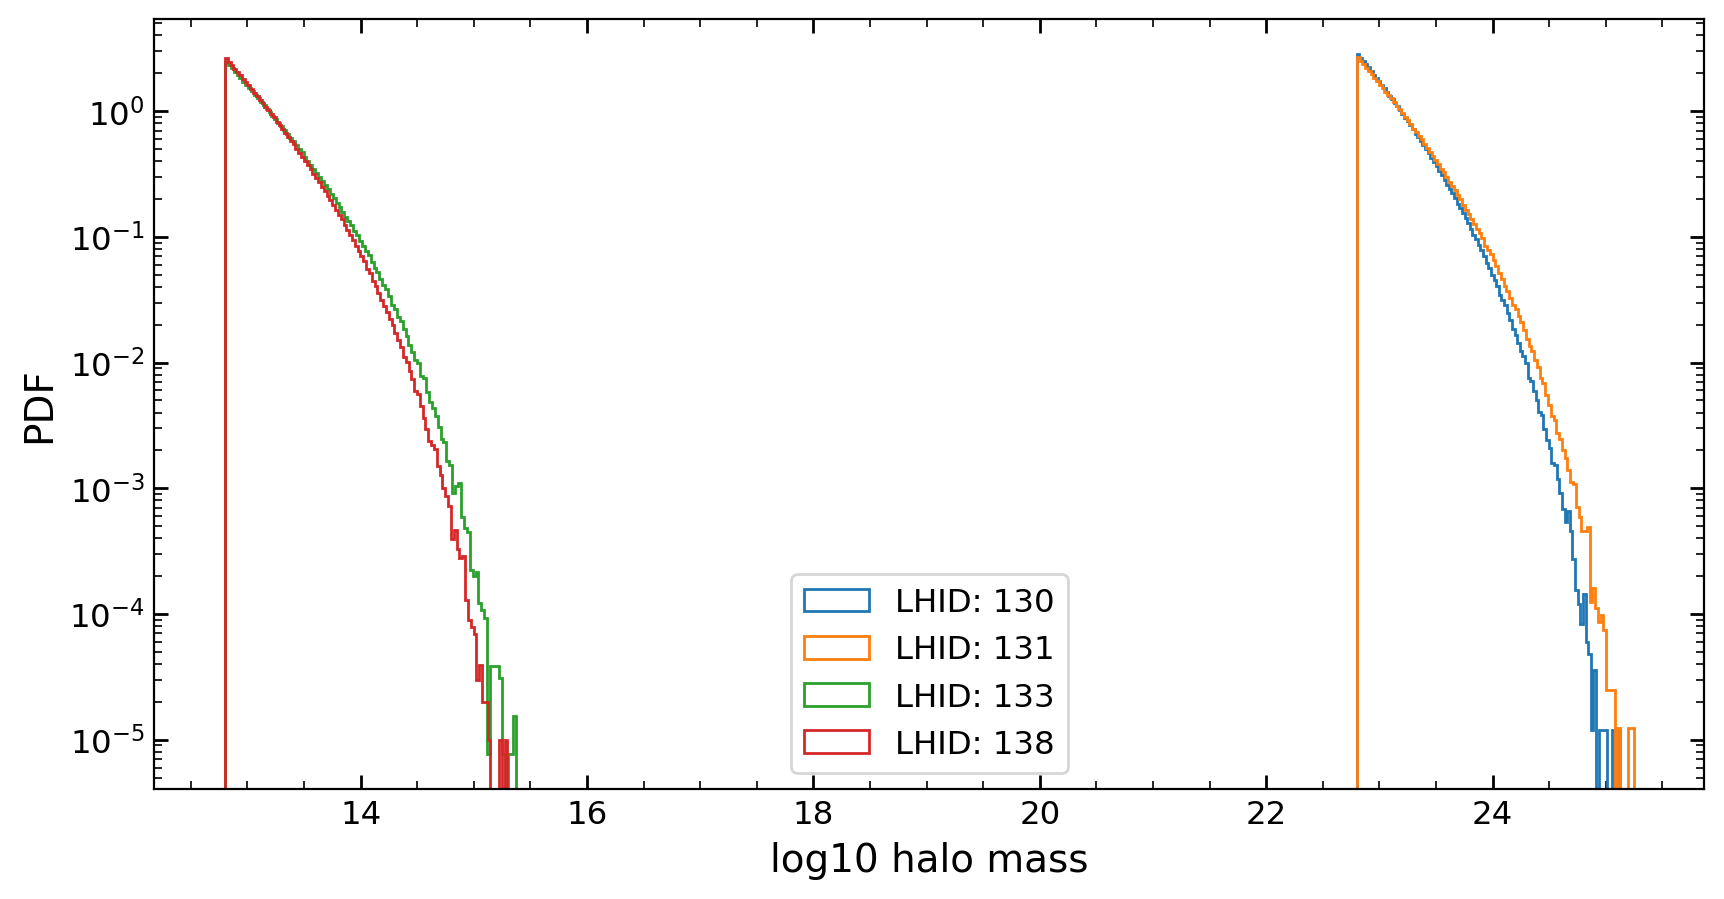

In [6]:
# plot mass distribution
f, ax = plt.subplots(1, 1, figsize=(10,5))
for i in inds[:N//2]:
    hmass = np.load(join(wdir, str(i), 'halo_mass.npy'))
    ax.hist(hmass, bins=100, histtype='step', label=f'LHID: {i}', density=True)
ax.semilogy()
ax.set(xlabel='log10 halo mass', ylabel='PDF')
ax.legend();

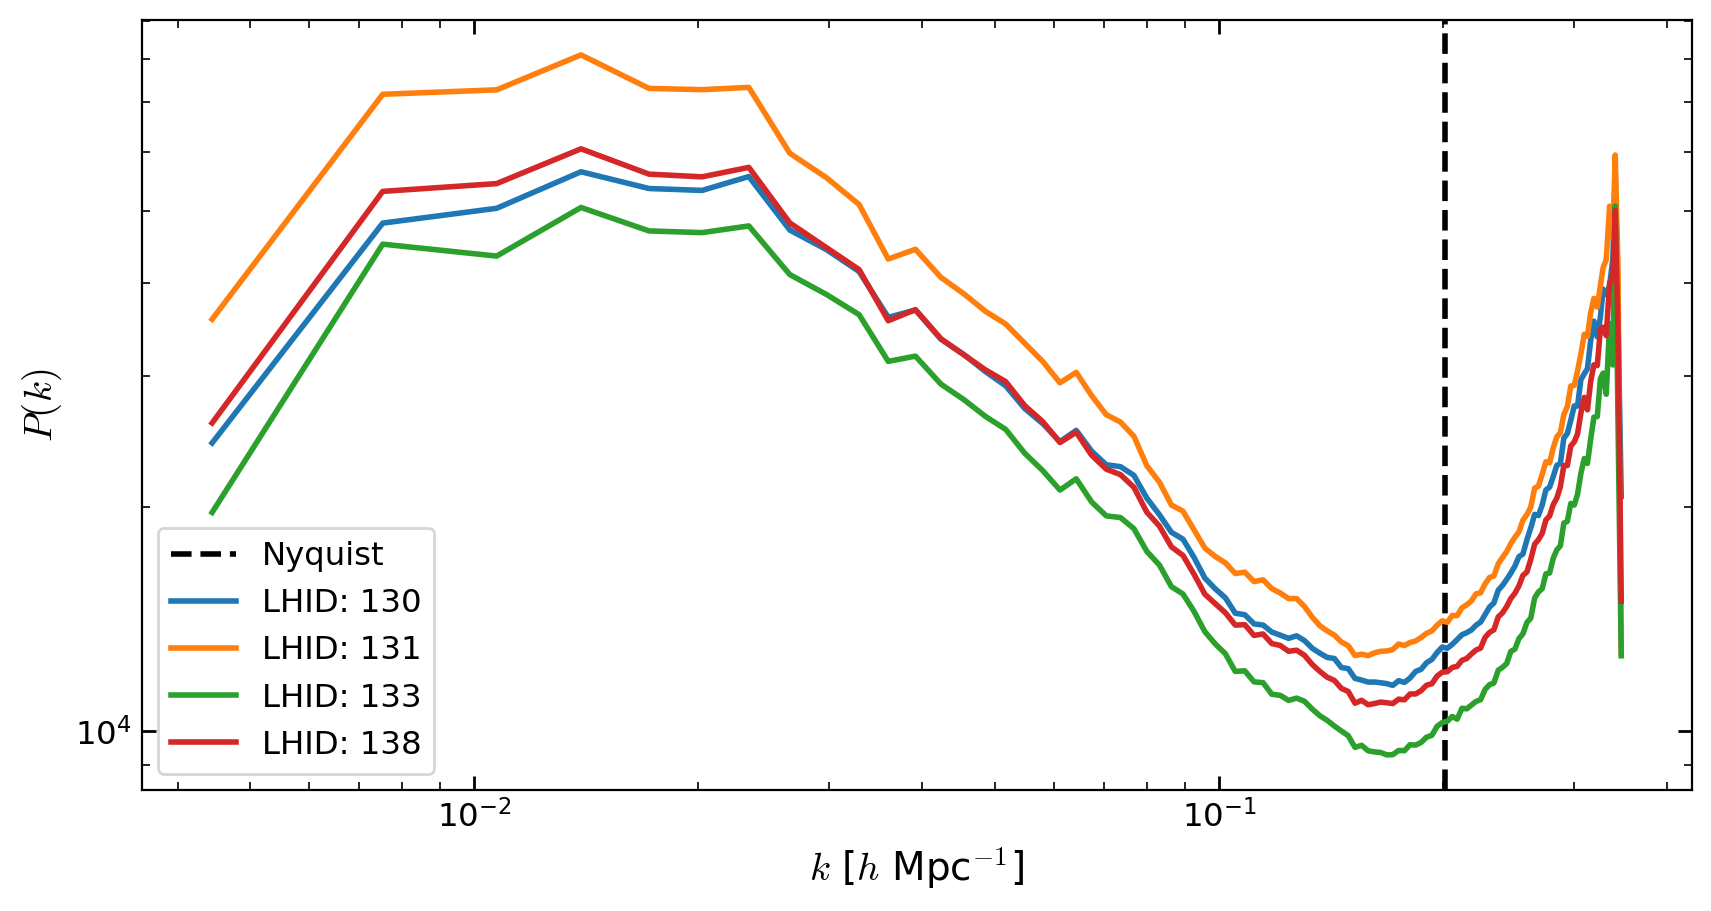

In [7]:
# plot halo P(k) distribution

Np = 128
nyq = np.pi*Np/2000

f, ax = plt.subplots(1, 1, figsize=(10,5))
ax.axvline(nyq, color='k', ls='--', label='Nyquist')
for i in inds[:N//2]:
    hpos = np.load(join(wdir, str(i), 'halo_pos.npy')) + 1000
    delta = np.zeros((Np, Np, Np), dtype=np.float32)
    MASL.MA(hpos, delta, BoxSize=2000, MAS='NGP', verbose=False)
    delta /= np.mean(delta)
    delta -= 1.0

    Pk = PKL.Pk(delta, BoxSize=2000, axis=0, MAS='NGP', threads=1, verbose=False)
    ax.plot(Pk.k3D, Pk.Pk[:,0], label=f'LHID: {i}')
ax.set(xlabel=r'$k$ [$h$ Mpc$^{-1}$]', ylabel=r'$P(k)$')
ax.loglog()
ax.legend();